In [5]:
# Install and import pyomo
!pip install -q pyomo
from pyomo.environ import *

# Install solver as well into collab session
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Ques:1

In [7]:
data=pd.read_csv('/content/Lab08_InterestRate.csv')

In [8]:
data

,Year,Interest Rate,Ratio,Rating
0,2003,0.0416,0.3615,85.6
1,2004,0.0312,0.2820,91.9
2,2005,0.0354,0.3010,89.1
3,2006,0.0331,0.3862,90.4
4,2007,0.0399,0.3578,86.3
5,2008,0.0501,0.4413,74.7
6,2009,0.0421,0.6753,79.8
7,2010,0.0507,0.6777,74.3
8,2011,0.0431,0.6585,84.4
9,2012,0.0437,0.6702,84.1


In [15]:
y=data['Interest Rate']

In [17]:
n=np.array(y).reshape(len(data), 1)

In [21]:
data1 = np.ones([len(data), 3])

In [38]:
data1[:, 1]= data['Ratio']
data1[:, 2]=data['Rating']

In [39]:
P = 2 * np.dot(data1.T, data1)
s = np.dot(n.T, n)
q = -2 * np.dot(n.T, data1)
lb = np.array([0, -np.inf, -np.inf])
ub = np.array([np.inf, np.inf, np.inf])

In [27]:
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp

In [40]:
x = solve_qp(P, q, None, None, None, None, lb, ub, solver='osqp')
print(x)

[ 0.09128332  0.01686998 -0.00069351]


In [41]:
u=x[1]*data['Ratio']
v=x[2]*data['Rating']

In [42]:
predicted_values = x[0] + u + v

In [43]:
predicted_values

0     0.038017
1     0.032307
2     0.034569
3     0.035105
4     0.037470
5     0.046923
6     0.047334
7     0.051188
8     0.043860
9     0.044265
10    0.036635
11    0.030473
12    0.031932
13    0.031529
14    0.034340
15    0.045844
16    0.050401
17    0.053295
18    0.044822
19    0.045432
dtype: float64

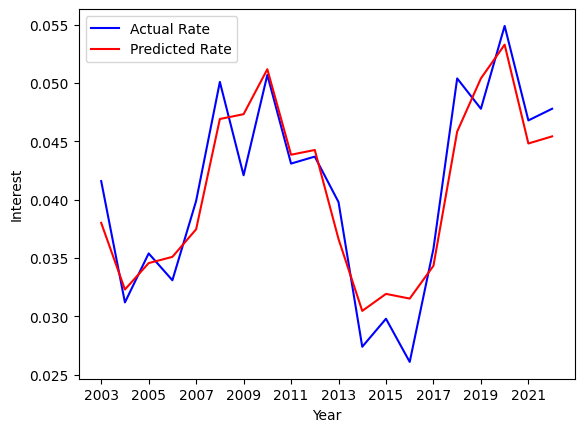

In [60]:
plt.plot(data['Year'], data['Interest Rate'],label='Actual Rate',color='b')
plt.plot(data['Year'], predicted_values,label='Predicted Rate',color='r')
plt.xticks(data['Year'][::2])
plt.xlabel('Year')
plt.ylabel('Interest')
plt.legend()
plt.show()